In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data  = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

# Part 1.1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc

In [3]:
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [4]:
data.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [6]:
data.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25857.000000,25857.000000,25857.000000,2.585700e+04,2.585700e+04,2.585700e+04,25857.000000,25857.000000,25857.000000,25857.000000,19392.000000,19392.000000,18330.000000
mean,390.431218,332.182774,99683.276482,2.169621e+06,1.155322e+06,1.107525e+06,9525.881386,2414.473115,0.336729,1716.548955,0.069627,7.252900,0.351061
std,230.696051,194.260924,62640.685612,4.542680e+06,2.407244e+06,2.326648e+06,16721.686071,3932.835240,0.030540,2993.025498,0.074970,6.538314,0.343334
min,120.000000,70.000000,33600.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,9.133000e+03,5.451000e+03,2.558000e+03,305.000000,36.030000,0.350000,23.420000,0.002400,1.630000,0.090000
50%,300.000000,300.000000,75000.000000,3.309680e+05,1.894490e+05,1.621620e+05,3457.000000,1173.660000,0.350000,762.880000,0.007700,3.035000,0.160000
75%,720.000000,600.000000,84000.000000,2.208484e+06,1.008171e+06,9.496930e+05,10681.000000,2692.280000,0.350000,1749.982000,0.128300,12.220000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


## Null Value Check

In [7]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

# Duplicate Value Check

In [8]:
print("Number of null values: ",data.duplicated().sum())

Number of null values:  0


In [9]:
impression_num = data['Impressions'].count()
impression_num

25857

## Part 1.2 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [10]:
CPM = ((data['Spend'].sum())/(data['Impressions'].count()))*1000

In [11]:
CPC = (data['Spend'].sum()/data['Clicks'].sum())

In [12]:
CTR = (data['Clicks'].sum()/(data['Impressions'].count()))

In [13]:
clicks = data['Clicks'].sum()

In [14]:
data['Clicks'].count()

25857

In [15]:
CPM

2414473.1148238387

In [16]:
CPC

0.25346453697720783

In [17]:
CTR

9525.881386085006

# Null Values treatment

In [18]:
data['CPM'] = data['CPM'].replace(np.nan, CPM)
data['CPC'] = data['CPC'].replace(np.nan, CPC)
data['CTR'] = data['CTR'].replace(np.nan, CTR)

In [19]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

# Part 1.3 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).



# Outlier Check

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPM'>

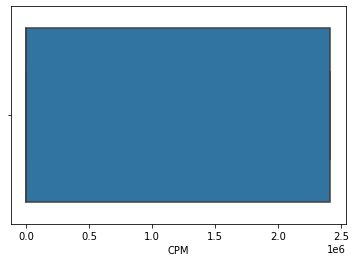

In [20]:
sns.boxplot(data['CPM'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPC'>

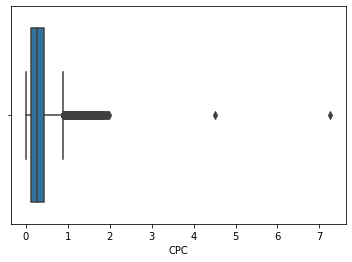

In [21]:
sns.boxplot(data['CPC'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

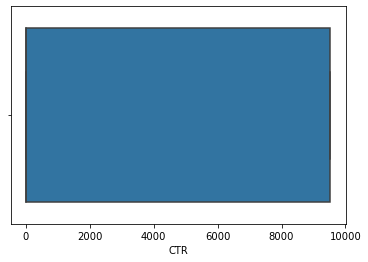

In [59]:
sns.boxplot(data['CTR'])

# Outlier Removal ( We wil Not apply outlier removal technique as there are lots of them instead we will use Standard scaler to reduce there effect)

In [60]:
data1 = data[(data['CTR']<0.009) & (data['CPC']<0.8) & (data['CPM']<2.5 ) & (data['CPM']>0.6)]
data1

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
609,11,Format5,720,300,216000,Inter228,Video,Mobile,Video,8,6,6,0,0.00,0.35,0.0000,0.0000,0.67,0.253465
2718,9,Format5,720,300,216000,Inter227,App,Mobile,Display,41,23,17,0,0.04,0.35,0.0200,0.0000,2.09,0.253465
2783,9,Format1,300,250,75000,Inter218,App,Mobile,Video,1475,236,231,1,0.14,0.35,0.0900,0.0043,0.61,0.140000
2801,11,Format1,300,250,75000,Inter222,Video,Desktop,Video,1926,218,215,1,0.22,0.35,0.1400,0.0047,1.02,0.220000
2805,10,Format1,300,250,75000,Inter224,Web,Desktop,Display,1730,371,366,1,0.23,0.35,0.1500,0.0027,0.63,0.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,9,Format6,336,250,84000,Inter219,Video,Desktop,Display,26332533,14168184,13714387,28734,21598.26,0.21,17062.6300,0.0021,1.57,0.750000
20923,9,Format2,728,90,65520,Inter221,App,Mobile,Display,27592861,14702025,14194774,28265,21977.09,0.21,17361.9000,0.0020,1.55,0.780000
20944,11,Format6,336,250,84000,Inter227,App,Mobile,Video,1057346,587204,576016,1176,863.35,0.35,561.1775,0.0020,1.50,0.730000
20948,11,Format1,300,250,75000,Inter221,App,Mobile,Display,3955744,2028909,2002900,5062,3586.57,0.33,2403.0019,0.0025,1.79,0.710000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

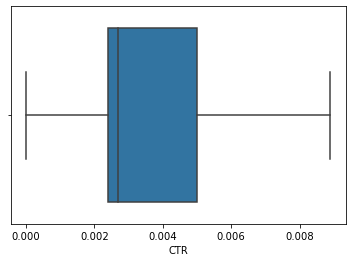

In [61]:
sns.boxplot(data1['CTR'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPC'>

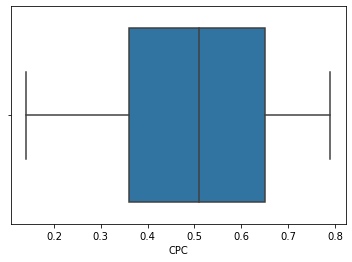

In [62]:
sns.boxplot(data1['CPC'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPM'>

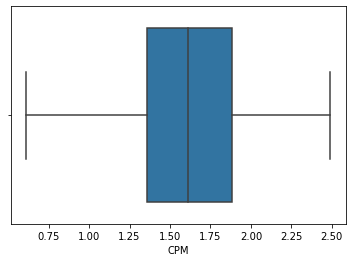

In [63]:
sns.boxplot(data1['CPM'])

In [58]:
from datetime import datetime

In [59]:
data['Timestamp'] = [data['Timestamp'][i].split('-')[1] for i in range(len(data['Timestamp']))]
data['Timestamp']

0         9
1         9
2         9
3         9
4         9
         ..
25852    10
25853    11
25854     9
25855     9
25856    10
Name: Timestamp, Length: 25857, dtype: object

In [60]:
for i in range(len(data['Timestamp'])):
  data['Timestamp'][i] = int(data['Timestamp'][i])

C:\Users\Dell\AppData\Local\Temp\ipykernel_9292\3088270374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'][i] = int(data['Timestamp'][i])


In [61]:
data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,9,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,9,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.00,0.35,0.0000,0.0000,0.0,NaN
2,9,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.00,0.35,0.0000,0.0000,0.0,NaN
3,9,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.00,0.35,0.0000,0.0000,0.0,NaN
4,9,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.00,0.35,0.0000,0.0000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,10,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,11,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,9,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,9,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


# Feature Engineering On Categorical Features

In [62]:
InventoryType_dummy = pd.get_dummies(data['InventoryType'])
InventoryType_dummy

,Format1,Format2,Format3,Format4,Format5,Format6,Format7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
25852,0,0,0,0,1,0,0
25853,0,0,0,1,0,0,0
25854,0,0,0,0,1,0,0
25855,0,0,0,0,0,0,1


In [63]:
Platform_dummy = pd.get_dummies(data['Platform'])
Platform_dummy

,App,Video,Web
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
25852,0,1,0
25853,0,1,0
25854,1,0,0
25855,0,1,0


In [64]:
Device_dummy = pd.get_dummies(data['Device Type'])
Device_dummy

,Desktop,Mobile
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
25852,1,0
25853,0,1
25854,0,1
25855,0,1


In [65]:
Format_dummy = pd.get_dummies(data['Format'])
Format_dummy

,Display,Video
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
25852,0,1
25853,0,1
25854,0,1
25855,1,0


In [66]:
Ad_dummy = pd.get_dummies(data['Ad Type'])
Ad_dummy

,Inter217,Inter218,Inter219,Inter220,Inter221,Inter222,Inter223,Inter224,Inter225,Inter226,Inter227,Inter228,Inter229,inter230
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,0,0,0,0,0,1,0,0,0,0,0,0,0,0
25853,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25854,0,0,0,0,1,0,0,0,0,0,0,0,0,0
25855,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Dummy trap to reduce dimensions

In [67]:
InventoryType_dummy.drop('Format7',axis=1,inplace =True)


In [68]:
InventoryType_dummy

,Format1,Format2,Format3,Format4,Format5,Format6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
25852,0,0,0,0,1,0
25853,0,0,0,1,0,0
25854,0,0,0,0,1,0
25855,0,0,0,0,0,0


In [69]:
Platform_dummy.drop('Web',axis=1,inplace =True)

In [70]:
Platform_dummy

,App,Video
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
25852,0,1
25853,0,1
25854,1,0
25855,0,1


In [71]:
Device_dummy.drop('Mobile',axis=1,inplace =True)

In [72]:
Device_dummy

,Desktop
0,1
1,0
2,1
3,1
4,0
...,...
25852,1
25853,0
25854,0
25855,0


In [73]:
Format_dummy.drop('Video',axis=1,inplace =True)
Ad_dummy.drop('inter230',axis=1,inplace =True)

# Conatenating our dummy features  into our dataset

In [74]:
data = pd.concat([data,InventoryType_dummy,Platform_dummy,Device_dummy,Format_dummy,Ad_dummy],axis=1)

In [75]:
data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Inter220,Inter221,Inter222,Inter223,Inter224,Inter225,Inter226,Inter227,Inter228,Inter229
0,9,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,0,0,1,0,0,0,0,0,0,0
1,9,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,...,0,0,0,1,0,0,0,0,0,0
2,9,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,...,0,0,0,0,0,0,0,0,0,0
3,9,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,...,0,0,0,0,1,0,0,0,0,0
4,9,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,10,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,...,0,0,1,0,0,0,0,0,0,0
25853,11,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,0,0,0,0,0,0,0,0,0,0
25854,9,Format5,720,300,216000,Inter221,App,Mobile,Video,2,...,0,1,0,0,0,0,0,0,0,0
25855,9,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,...,0,0,0,0,0,0,0,0,1,0


# Dropping the old features

In [41]:
data = data.drop(['InventoryType','Platform','Device Type','Ad Type','Format'],axis=1)

In [42]:
data

,Timestamp,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,...,Inter220,Inter221,Inter222,Inter223,Inter224,Inter225,Inter226,Inter227,Inter228,Inter229
0,9,300,250,75000,1806,325,323,1,0.00,0.35,...,0,0,1,0,0,0,0,0,0,0
1,9,300,250,75000,1979,384,380,0,0.00,0.35,...,0,0,0,1,0,0,0,0,0,0
2,9,336,250,84000,1566,298,297,0,0.00,0.35,...,0,0,0,0,0,0,0,0,0,0
3,9,300,250,75000,643,103,102,0,0.00,0.35,...,0,0,0,0,1,0,0,0,0,0
4,9,300,250,75000,1550,347,345,0,0.00,0.35,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,10,720,300,216000,1,1,1,0,0.01,0.35,...,0,0,1,0,0,0,0,0,0,0
25853,11,120,600,72000,7,1,1,1,0.07,0.35,...,0,0,0,0,0,0,0,0,0,0
25854,9,720,300,216000,2,2,2,1,0.09,0.35,...,0,1,0,0,0,0,0,0,0,0
25855,9,300,600,180000,1,1,1,0,0.01,0.35,...,0,0,0,0,0,0,0,0,1,0


# Part 1.4 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

# Applying  Z-score scaling

In [43]:
from sklearn.preprocessing import StandardScaler
rs = StandardScaler()
scaled = pd.DataFrame(rs.fit_transform(data),columns = data.columns)
scaled.head()

,Timestamp,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,...,Inter220,Inter221,Inter222,Inter223,Inter224,Inter225,Inter226,Inter227,Inter228,Inter229
0,-1.189701,-0.392000,-0.423062,-0.394053,-0.477220,-0.479810,-0.475888,-0.569624,-0.613939,0.434559,...,-0.277437,-0.277437,3.605476,-0.277356,-0.277356,-0.277194,-0.277194,-0.277437,-0.277194,-0.277194
1,-1.189701,-0.392000,-0.423062,-0.394053,-0.477182,-0.479785,-0.475864,-0.569683,-0.613939,0.434559,...,-0.277437,-0.277437,-0.277356,3.605476,-0.277356,-0.277194,-0.277194,-0.277437,-0.277194,-0.277194
2,-1.189701,-0.235948,-0.423062,-0.250374,-0.477273,-0.479821,-0.475899,-0.569683,-0.613939,0.434559,...,-0.277437,-0.277437,-0.277356,-0.277356,-0.277356,-0.277194,-0.277194,-0.277437,-0.277194,-0.277194
3,-1.189701,-0.392000,-0.423062,-0.394053,-0.477476,-0.479902,-0.475983,-0.569683,-0.613939,0.434559,...,-0.277437,-0.277437,-0.277356,-0.277356,3.605476,-0.277194,-0.277194,-0.277437,-0.277194,-0.277194
4,-1.189701,-0.392000,-0.423062,-0.394053,-0.477276,-0.479801,-0.475879,-0.569683,-0.613939,0.434559,...,-0.277437,-0.277437,-0.277356,-0.277356,-0.277356,3.607580,-0.277194,-0.277437,-0.277194,-0.277194


# Checking the effect of outlier after applying Standard scaler

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

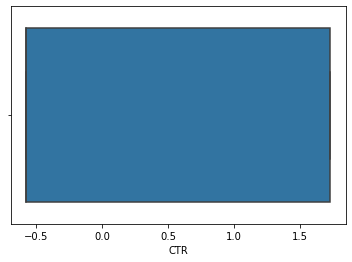

In [82]:
sns.boxplot(scaled['CTR'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

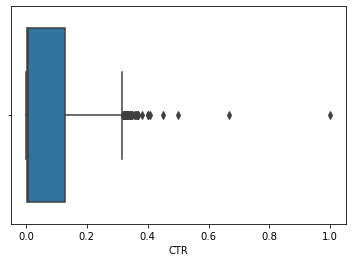

In [83]:
sns.boxplot(data['CTR'])

# Part 1.5 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [101]:
import scipy.cluster.hierarchy as shc

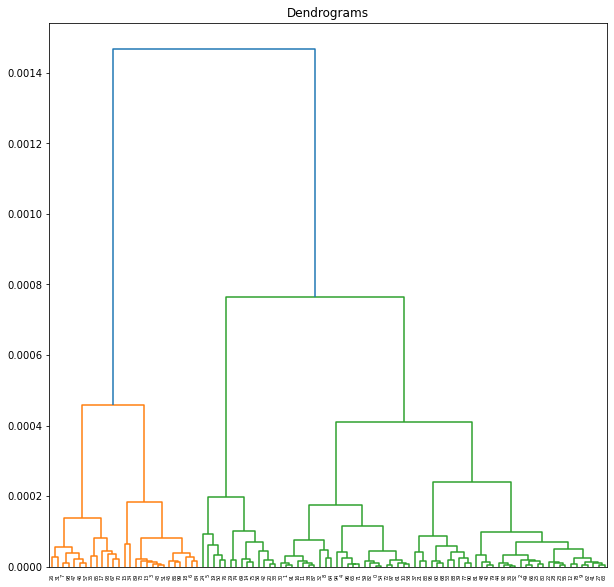

In [102]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X[:100,:], method='ward'))
plt.axhline(y=0.0019, color='r', linestyle='--')

# Part 1.6 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

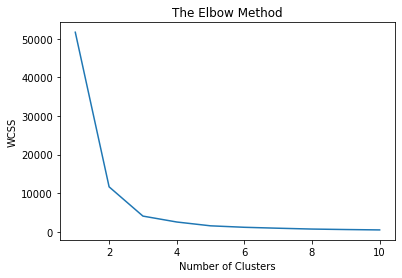

In [104]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Part 1.7 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [126]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [127]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 # silhouette score
silhouette_avg.append(silhouette_score(X, cluster_labels))


In [128]:
silhouette_avg

[0.682105390164661]

# Part 1.8 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [129]:
X

array([[-0.47721976, -0.47588801],
       [-0.47718167, -0.47586351],
       [-0.47727259, -0.47589918],
       ...,
       [-0.47761689, -0.47602597],
       [-0.47761711, -0.4760264 ],
       [-0.47761711, -0.4760264 ]])

In [130]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [131]:
X =scaled.iloc[:,[4,6]].values

In [132]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

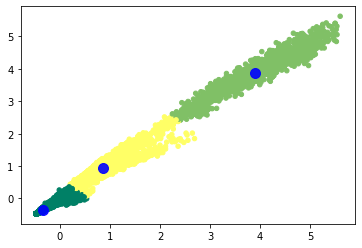

In [133]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

# Bar Plot

<Figure size 2880x2880 with 0 Axes>

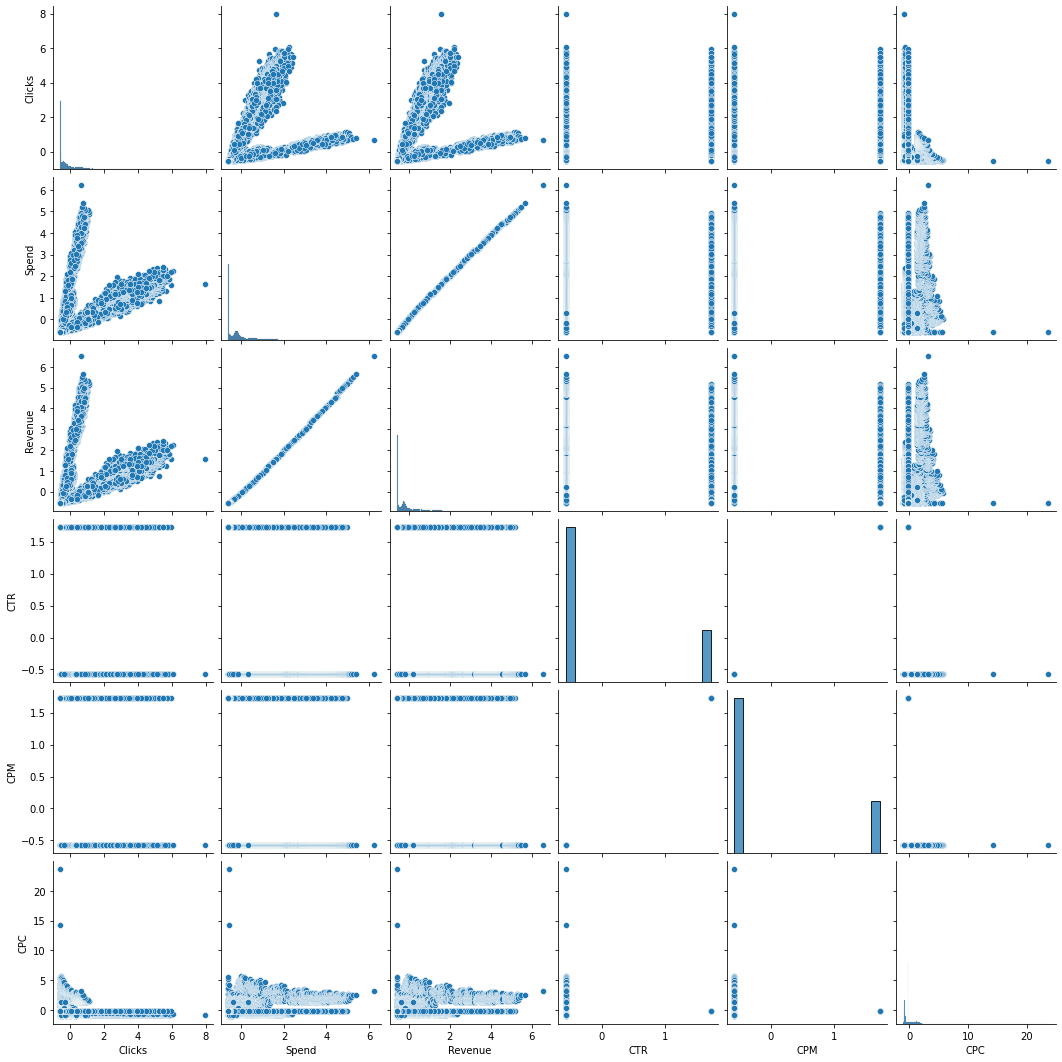

In [97]:
plt.figure(figsize=(40,40))
sns.pairplot(scaled[['Clicks','Spend','Revenue','CTR','CPM','CPC']])

In [114]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  float64
 1   Ad - Length            25857 non-null  float64
 2   Ad- Width              25857 non-null  float64
 3   Ad Size                25857 non-null  float64
 4   Available_Impressions  25857 non-null  float64
 5   Matched_Queries        25857 non-null  float64
 6   Impressions            25857 non-null  float64
 7   Clicks                 25857 non-null  float64
 8   Spend                  25857 non-null  float64
 9   Fee                    25857 non-null  float64
 10  Revenue                25857 non-null  float64
 11  CTR                    25857 non-null  float64
 12  CPM                    25857 non-null  float64
 13  CPC                    25857 non-null  float64
 14  Format1                25857 non-null  float64
 15  Fo

# Heatmap to check correlations between features

<AxesSubplot:>

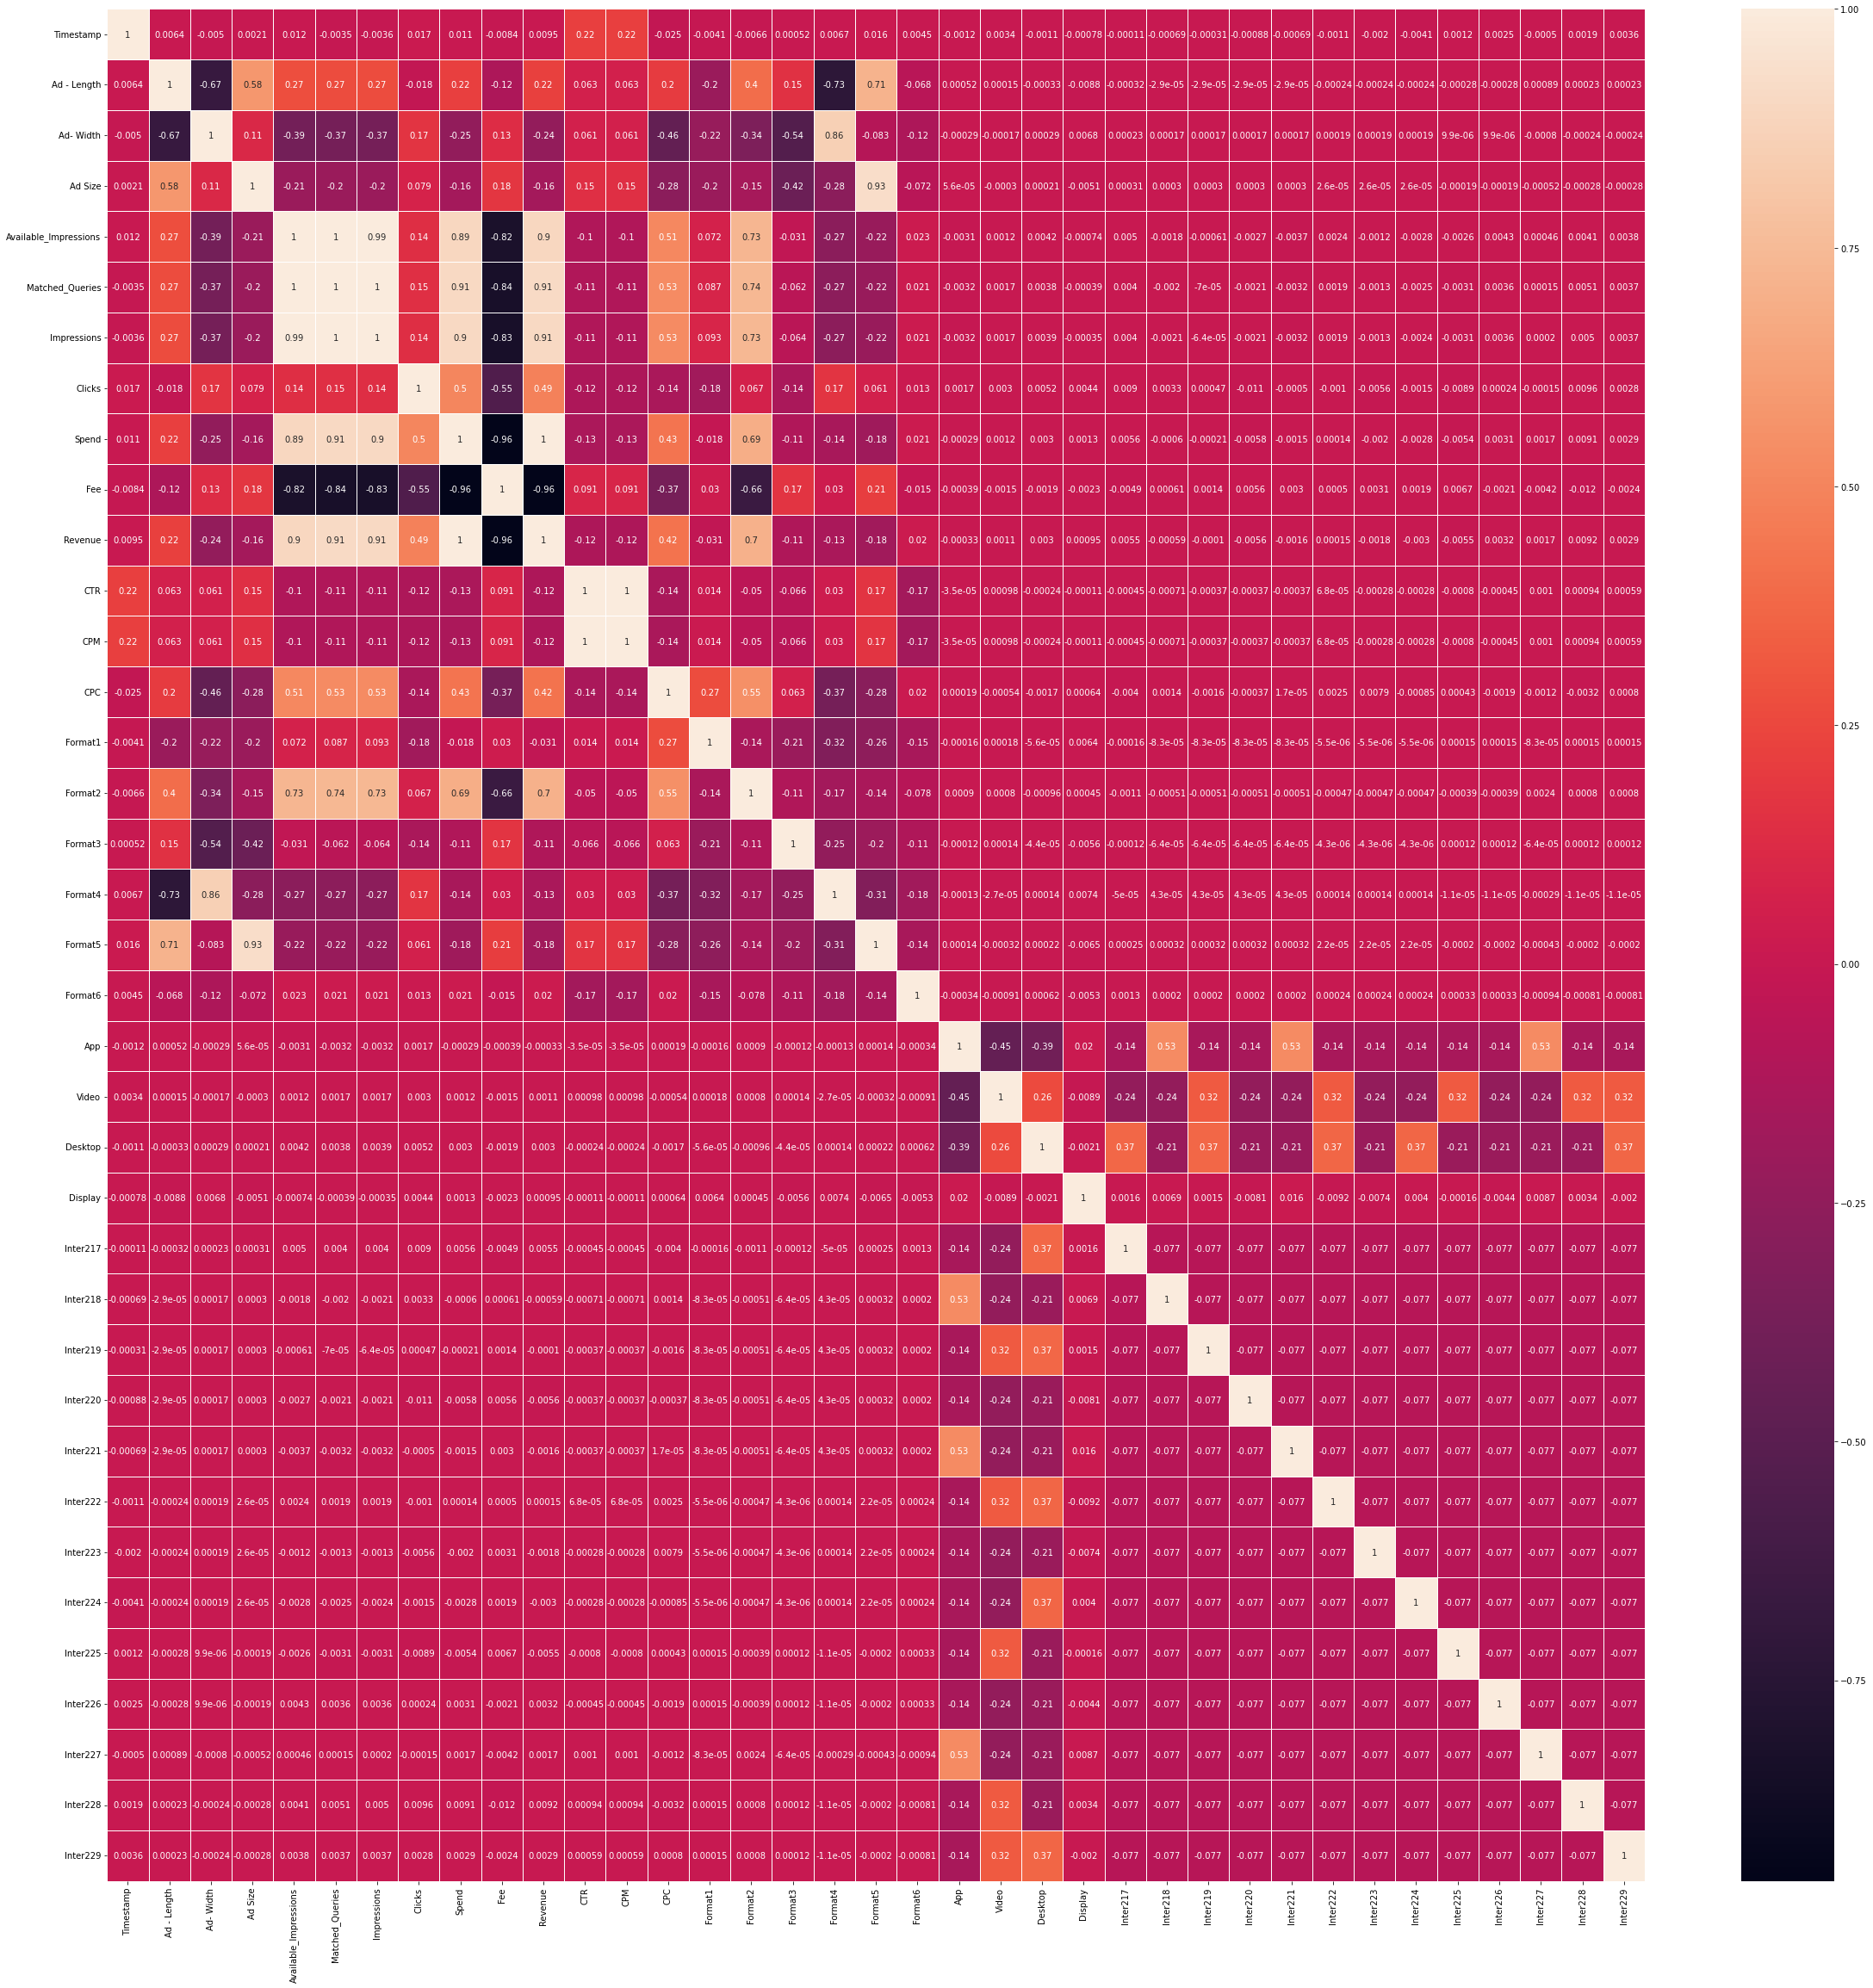

In [134]:
plt.figure(figsize=(40,40))
sns.heatmap(scaled.corr(),annot=True,linewidths=1)